In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
# from pyunpack import Archive
# import shutil
# if not os.path.exists('/kaggle/working/tensorflow-speech-recognition-challenge/train/'):
#     os.makedirs('/kaggle/working/tensorflow-speech-recognition-challenge/train/')
# Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/tensorflow-speech-recognition-challenge/train/')

for dirname, _, filenames in os.walk('train/train/audio'):
    for filename in filename[:5]:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install librosa

In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

In [15]:
train_audio_path = 'train\\audio'

In [16]:
train_audio_path

'train\\audio'

In [17]:
for it in os.scandir(train_audio_path):
    if it.is_dir():
        print(it.path)

train\audio\bed
train\audio\bird
train\audio\cat
train\audio\dog
train\audio\down
train\audio\eight
train\audio\five
train\audio\four
train\audio\go
train\audio\happy
train\audio\house
train\audio\left
train\audio\marvin
train\audio\nine
train\audio\no
train\audio\off
train\audio\on
train\audio\one
train\audio\right
train\audio\seven
train\audio\sheila
train\audio\six
train\audio\stop
train\audio\three
train\audio\tree
train\audio\two
train\audio\up
train\audio\wow
train\audio\yes
train\audio\zero
train\audio\_background_noise_


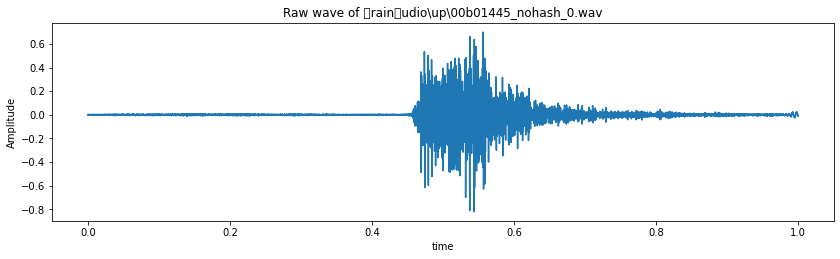

In [21]:
samples, sample_rate = librosa.load('train\\audio\\up\\00b01445_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '\train\audio\\up\\00b01445_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

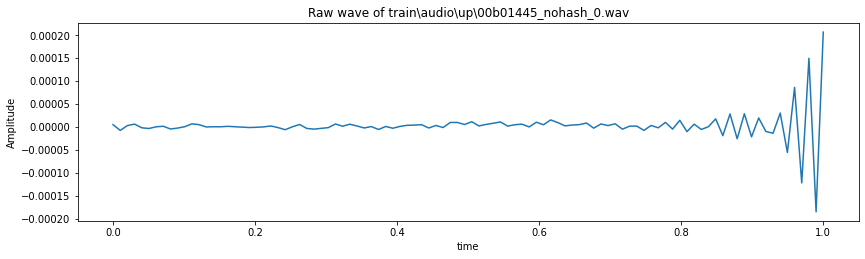

In [23]:
samples, sample_rate = librosa.load('train\\audio\\up\\00b01445_nohash_0.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'train\\audio\\up\\00b01445_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [24]:
sample_rate=40000
samples, sample_rate = librosa.load('train\\audio\\up\\00b01445_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [27]:
sample_rate=16000
samples, sample_rate = librosa.load('train\\audio\\up\\0d53e045_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

**Resampling**

From the above, we can understand that the sampling rate of the signal is 16000 hz. Let us resample it to 8000 hz since most of the speech related frequencies are present in 8000z 

In [29]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

Now, let’s understand the number of recordings for each voice command:

In [30]:
labels=os.listdir(train_audio_path)

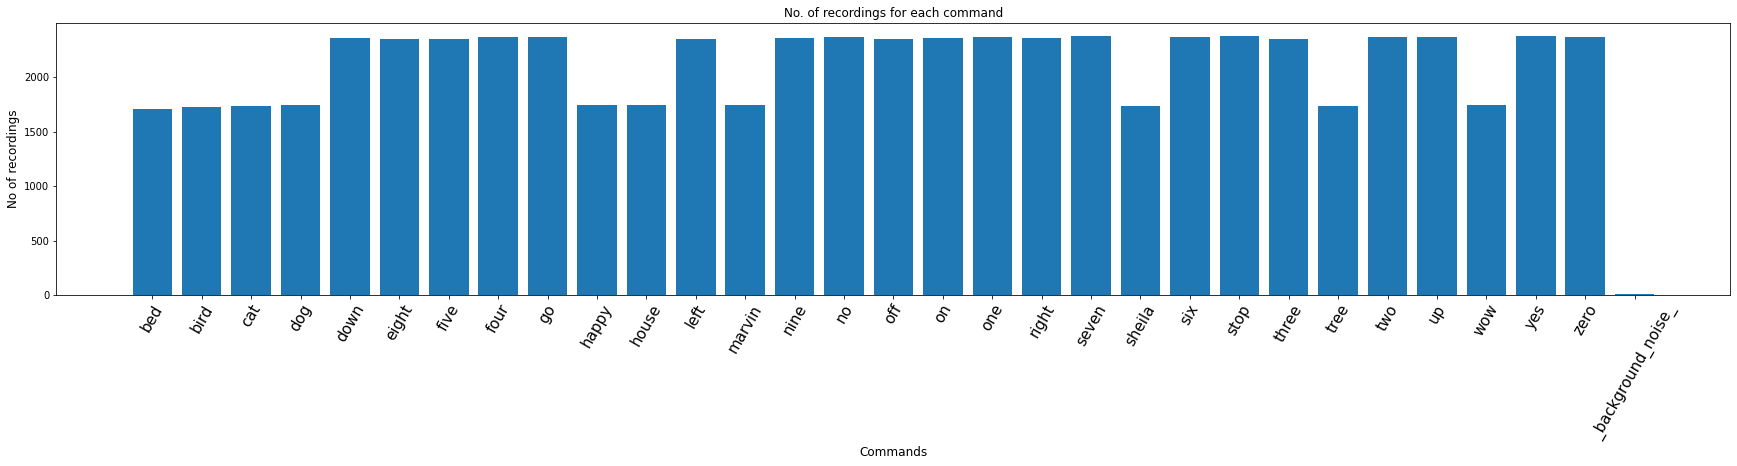

In [31]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [32]:
# labels=["yes", "no","stop", "go"]
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

**Duration of recordings**

What’s next? A look at the distribution of the duration of recordings:

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

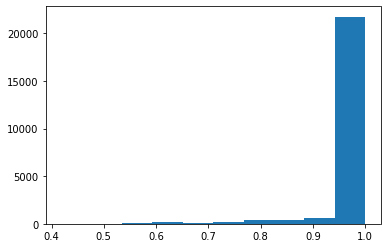

In [33]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [34]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [35]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
21312


In [36]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

21312
(8000,)


array([0.00040333, 0.00062642, 0.00036715, ..., 0.00081178, 0.0004867 ,
       0.00071138], dtype=float32)

Convert the output labels to integer encoded:

In [37]:
len(set(all_label))

10

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [39]:
classes

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

Now, convert the integer encoded labels to a one-hot vector since it is a multi-classification problem:

In [41]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [42]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Reshape the 2D array to 3D since the input to the conv1d must be a 3D array:

In [43]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [44]:
all_wave.shape

(21312, 8000, 1)

**Split into train and validation set**

Next, we will train the model on 80% of the data and validate on the remaining 20%:


In [47]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

MemoryError: Unable to allocate 650. MiB for an array with shape (21312, 8000, 1) and data type float32

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

In [ ]:
# ?Conv1D

In [ ]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(filters=8,kernel_size=13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Define the loss function to be categorical cross-entropy since it is a multi-classification problem:

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

Let us train the model on a batch size of 32 and evaluate the performance on the holdout set:

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from keras.models import load_model
model.save("SpeechRecogModel.h5")
#model=load_model('/kaggle/working/best_model.hdf5')

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

Prediction time! Make predictions on the validation data:

In [ ]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

In [ ]:
print("Text:",predict(samples))

In [ ]:
# # ! pip install sounddevice==0.2.1

# import sounddevice as sd
# import soundfile as sf

In [ ]:
# samplerate = 16000  
# duration = 1 # seconds
# filename = 'yes.wav'
# print("start")
# mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,channels=1, blocking=True)
# print("end")
# sd.wait()
# sf.write(filename, mydata, samplerate)

In [ ]:
# #reading the voice commands
# samples, sample_rate = librosa.load(filepath + '/' + 'stop.wav', sr = 16000)
# samples = librosa.resample(samples, sample_rate, 8000)
# ipd.Audio(samples,rate=8000)              

In [ ]:
# #converting voice commands to text
# predict(samples)